# CWordTM Usage on BBC News

This Jupyter notebook demonstrates how to use the package "CWordTM" 
on the BBC News:

1. Meta Information Features
1. Utility Features
1. Text Visualization - Word Cloud
1. Text Summarization
1. Topic Modeling - LDA and BERTopic

## 1. Meta Information Features

In [1]:
import cwordtm
from cwordtm import *

In [2]:
# Show execution time
df = util.load_text("BBC/BBC News Train.csv", timing=True)

Loading file 'BBC/BBC News Train.csv' ...
Finished 'load_text' in 0.1035 secs


In [3]:
# Execute and show code
df = util.load_text("BBC/BBC News Train.csv", code=1)

Loading file 'BBC/BBC News Train.csv' ...

def load_text(filepath, nr=0, info=False):
    """Loads and returns the text from the prescribed file path ('filepath').

    :param filepath: The prescribed filepath from which the text is loaded,
        default to None
    :type filepath: str
    :param nr: The number of rows of text to be loaded; 0 represents all rows,
        default to 0
    :type nr: int, optional
    :param info: The flag whether the dataset information is shown,
        default to False
    :type info: bool, optional
    :return: The collection of text with the prescribed number of rows loaded
    :rtype: pandas.DataFrame
    """

    print("Loading file '%s' ..." %filepath)
    df = pd.read_csv(filepath)
    if nr > 0:
       print("Initial Records:")
       print(df.head(int(nr)))
    if info:
        print("\nDataset Information:")
        df.info()
    return df



In [4]:
# Show code without execution
df = util.load_text("BBC/BBC News Train.csv", code=2)


def load_text(filepath, nr=0, info=False):
    """Loads and returns the text from the prescribed file path ('filepath').

    :param filepath: The prescribed filepath from which the text is loaded,
        default to None
    :type filepath: str
    :param nr: The number of rows of text to be loaded; 0 represents all rows,
        default to 0
    :type nr: int, optional
    :param info: The flag whether the dataset information is shown,
        default to False
    :type info: bool, optional
    :return: The collection of text with the prescribed number of rows loaded
    :rtype: pandas.DataFrame
    """

    print("Loading file '%s' ..." %filepath)
    df = pd.read_csv(filepath)
    if nr > 0:
       print("Initial Records:")
       print(df.head(int(nr)))
    if info:
        print("\nDataset Information:")
        df.info()
    return df




In [5]:
# Add timing and code reveal features to some other function
from importlib_resources import files
files = meta.addin(files)
files(code=2)


@package_to_anchor
def files(anchor: Optional[Anchor] = None) -> Traversable:
    """
    Get a Traversable resource for an anchor.
    """
    return from_package(resolve(anchor))




## 2. Utility Features

### Load BBC News

In [6]:
bbc_file = "BBC/BBC News Train.csv"
df = util.load_text(bbc_file, info=True)

Loading file 'BBC/BBC News Train.csv' ...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Preprocessing Text

In [7]:
text_list = util.get_text_list(df.iloc[:500], text_col='Text')
text = util.preprocess_text(text_list)

## 3. Text Visualization - Word Cloud

C:\Dev\Anaconda3\envs\aiml\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


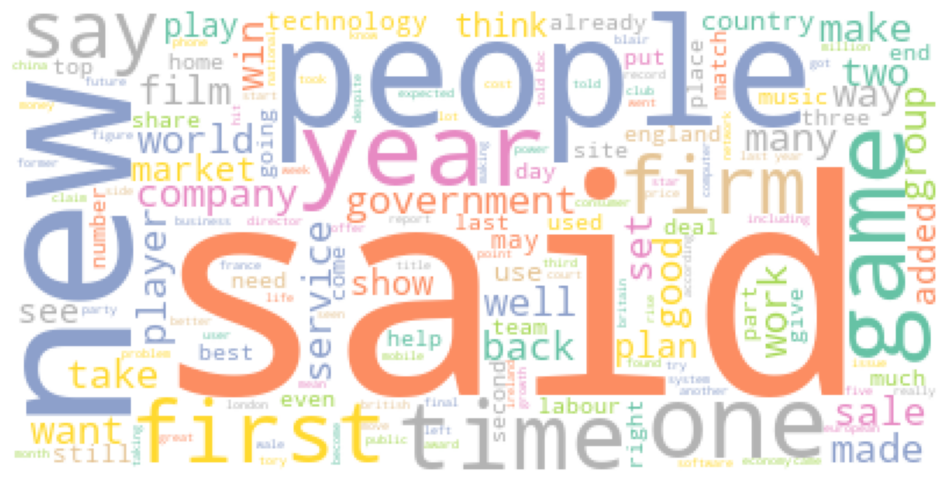

In [8]:
# White background with no image mask
viz.show_wordcloud(text)

C:\Dev\Anaconda3\envs\aiml\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


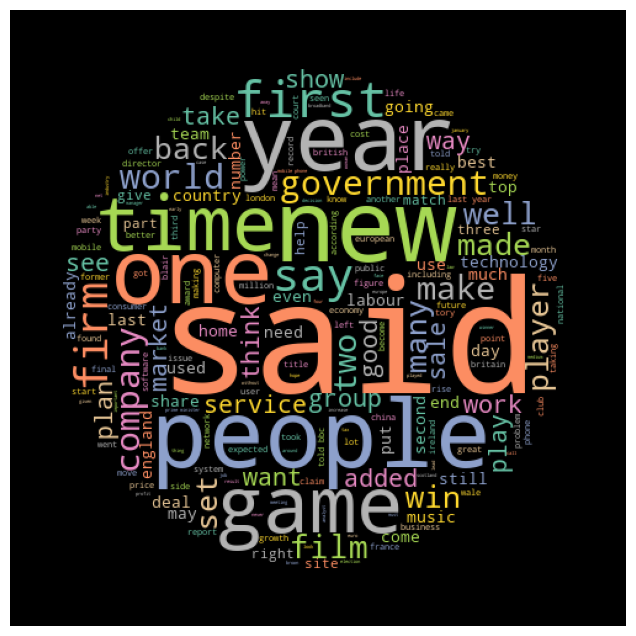

In [9]:
# Black background with the prescribed image as the mask
viz.show_wordcloud(text, bg='black', image='images/disc.png')

## 4. Text Summarization

In [10]:
news = df.iloc[:50]['Text']  # "df" stores previously loaded text
ta.summary(news, weight=3)

['in  the figure was %',
 'they also have to want it',
 'in a way  they were doing exactly what they do now']

## 5. Topic Modeling

### LDA Model

In [11]:
doc_file = "BBC/BBC News Train.csv"
lda = tm.lda_process(doc_file, source=1, text_col='Text', eval=True)

Corpus loaded!
Text preprocessed!
Text trained!
If no visualization is shown,
  you may execute the following commands to show the visualization:
    > import pyLDAvis
    > pyLDAvis.display(lda.vis_data)
Visualization prepared!

Topics from LDA Model:
[(0,
  '0.029*"" + 0.025*"s" + 0.021*"m" + 0.013*"£" + 0.010*"bn" + 0.010*"said" + '
  '0.008*"share" + 0.007*"profit" + 0.007*"club" + 0.007*"firm"'),
 (1,
  '0.031*"" + 0.015*"said" + 0.014*"game" + 0.012*"s" + 0.010*"use" + '
  '0.009*"peopl" + 0.006*"technolog" + 0.006*"new" + 0.006*"comput" + '
  '0.005*"year"'),
 (2,
  '0.034*"" + 0.020*"s" + 0.014*"m" + 0.010*"said" + 0.010*"world" + '
  '0.008*"champion" + 0.008*"olymp" + 0.007*"year" + 0.006*"win" + '
  '0.006*"women"'),
 (3,
  '0.018*"mr" + 0.016*"s" + 0.016*"said" + 0.015*"parti" + 0.012*"elect" + '
  '0.009*"blair" + 0.008*"" + 0.006*"labour" + 0.006*"say" + 0.006*"ukip"'),
 (4,
  '0.014*"" + 0.011*"mobil" + 0.011*"v" + 0.011*"s" + 0.010*"music" + '
  '0.007*"said" + 0.005*"c

In [12]:
# LDA Model Visualization
import pyLDAvis
pyLDAvis.display(lda.vis_data)

### BERTopic Model

In [13]:
btm = tm.btm_process(doc_file, source=1, text_col='Text', eval=True)

Corpus loaded!
Text preprocessed!
Text trained!

Topics from BERTopic Model:
Topic 0: said | mr | govern | year | bn | elect | say | labour | parti | minist
Topic 1: england | ireland | wale | game | rugbi | win | play | half | franc | player
Topic 2: club | chelsea | unit | arsenal | leagu | goal | game | play | liverpool | player
Topic 3: music | band | album | song | chart | record | singl | singer | year | perform
Topic 4: film | best | award | star | actor | oscar | nomin | director | actress | year
Topic 5: technolog | use | gadget | search | peopl | said | comput | blog | digit | devic
Topic 6: open | roddick | seed | match | australian | play | nadal | set | win | final
Topic 7: virus | mail | spam | site | secur | user | program | attack | use | softwar
Topic 8: olymp | holm | race | world | indoor | champion | radcliff | championship | marathon | athlet
Topic 9: mobil | phone | camera | use | handset | peopl | servic | music | technolog | said
Topic 10: broadband | tv | servi

  If no visualization is shown,
    you may execute the following commands one-by-one:
      btm.model.visualize_topics()
      btm.model.visualize_barchart()
      btm.model.visualize_heatmap()

